In [11]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-01-30 14:18:46,230: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

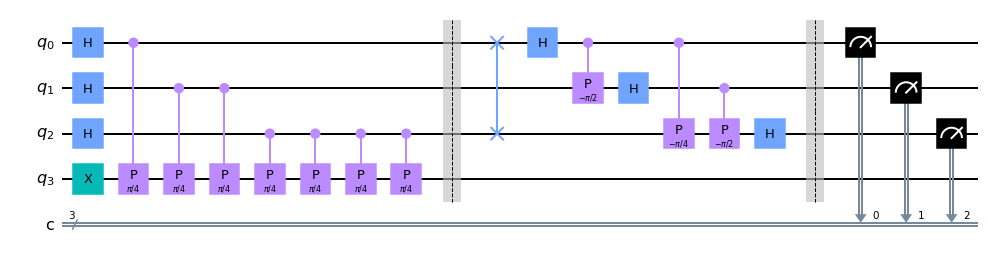

In [13]:
#Apply X gate to set the state to 1
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()
#Apply H gate on the counting qubits
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()
#Apply Controlled Unitary (U) operation on the counting qubits
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw()
#Apply inverse QFT to transform the state in counting register
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)
#Apply measurement on the counting register
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
#Draw the final diagram
qpe.draw()

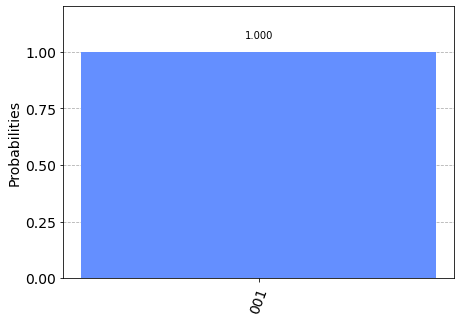

In [14]:
#Results of the QPE procedure
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

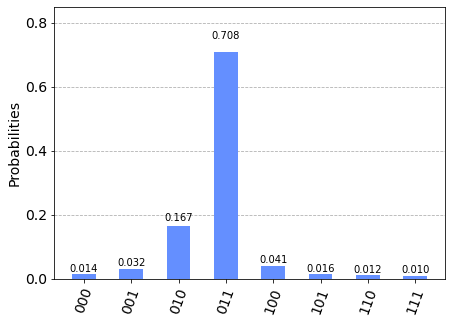

In [15]:
#Calculate the case where the phase is 1/3
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()
#Results for the case with the phase 1/3
# Let's see the results!
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


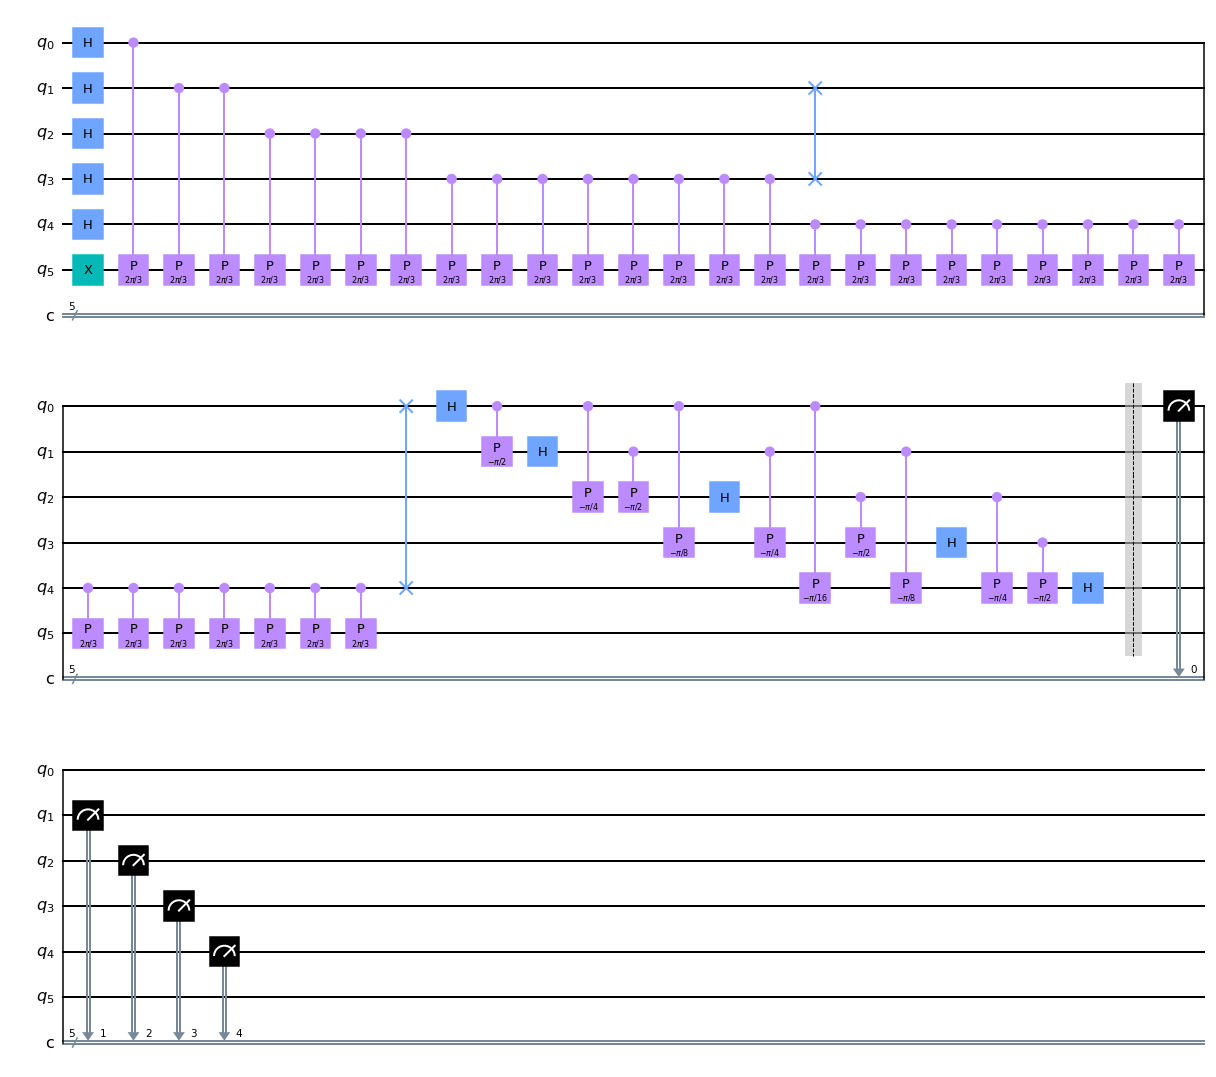

In [16]:
#adding more counting qubits
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()


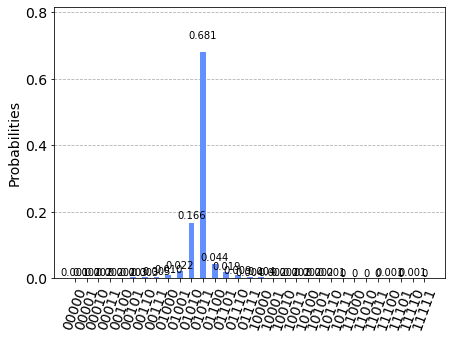

In [17]:
# Plot the results

backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


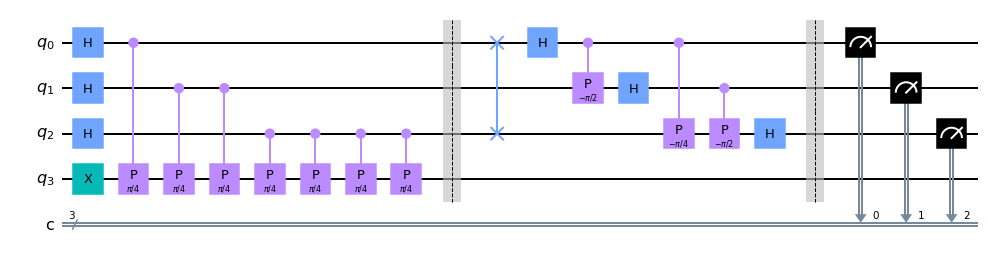

In [18]:
# Running QPE on real quantum device
qpe.draw()

In [ ]:
#Run the circuit on quantum device
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_santiago')

# Run with 2048 shots
shots = 2048
job = execute(qpe, backend=backend, shots=2048, optimization_level=3)
job_monitor(job)
#Calculate and display the results
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)

ibmqfactory.load_account:WARNING:2021-01-30 14:21:27,779: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (21)    

In [ ]:
#This can take some time 